In [24]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
from pathlib import Path
import pandas as pd
import numpy as np
from tensorflow.keras import layers, Input
import matplotlib.pyplot as plt
import random
import tensorflow.keras.backend as K

K.clear_session()
physical_devices = tf.config.list_physical_devices('GPU')
num_physical_devices = len(physical_devices)
print("GPUs Available: ", num_physical_devices)
if num_physical_devices > 0:
    tf.config.set_visible_devices(physical_devices[0], 'GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

GPUs Available:  1


In [31]:
notebook_path = os.path.abspath('')
parent_path = os.path.dirname(notebook_path)
path_to_data = Path(parent_path) / f"./DeepDreams/machine-learning-in-science-ii-2023"
train_image_paths_csv = pd.read_csv(str(path_to_data/'training_norm_paths.csv'))

dataset = tf.data.Dataset.from_tensor_slices((train_image_paths_csv['image_path'],
                                              train_image_paths_csv['speed'],
                                              train_image_paths_csv['angle']))

image_shape = (32, 32)

# Define a function that maps each row to an image and a pair of labels
def load_training_images_and_labels(image_path, speed_label, angle_label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, image_shape)
    # Convert the class label to an integer
    speed_label = tf.cast(speed_label, tf.int32)
    # Convert the regression label to a float
    angle_label = tf.cast(angle_label, tf.float32)
    return image, (speed_label, angle_label)

dataset = dataset.map(load_training_images_and_labels)

def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)

<class 'tensorflow.python.framework.ops.Tensor'>


#### Original Image

Text(0.5, 1.0, 'Target speed: 0\nTarget angle: 0.4375')

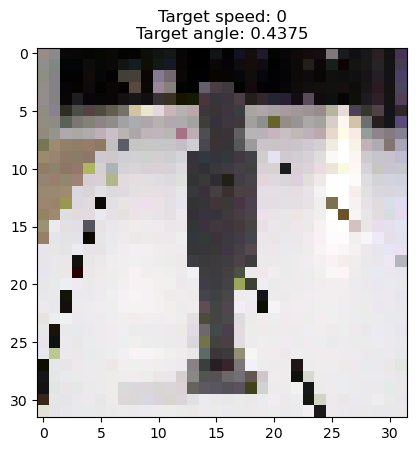

In [37]:
original_image, label = next(iter(dataset))
original_image = np.uint8(original_image)
plt.imshow(original_image)
plt.title(f"Target speed: {label[0].numpy()}\nTarget angle: {label[1].numpy()}")

#### Random flip + rotation

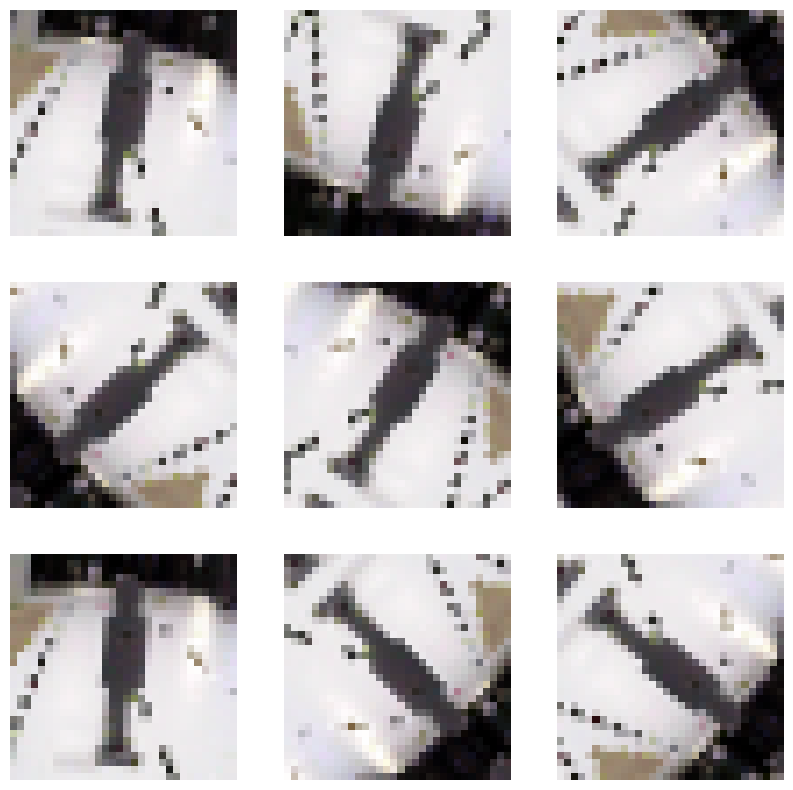

In [38]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# Add the image to a batch.
batched_original_image = tf.cast(tf.expand_dims(original_image, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = np.uint8(data_augmentation(batched_original_image))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

#### Random brightness

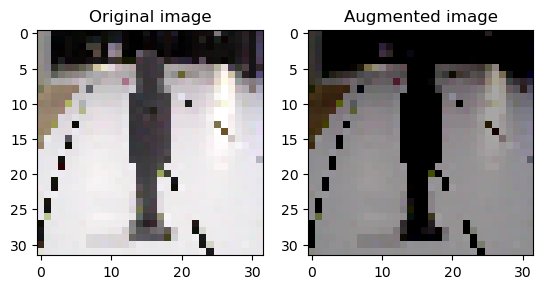

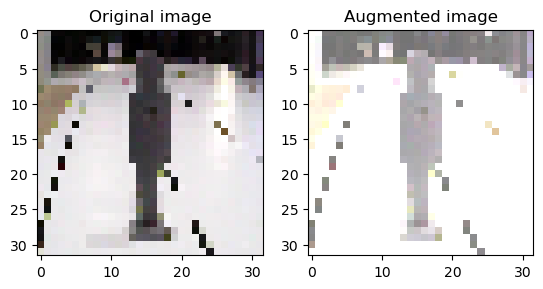

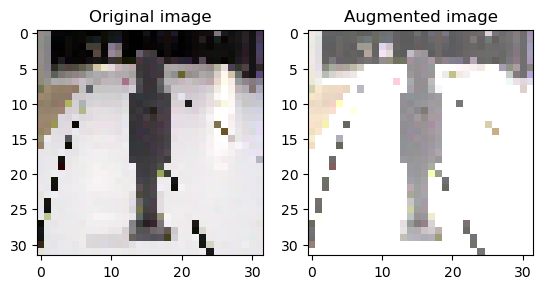

In [5]:
seed = random.randrange(100),(random.randrange(100))
for i in range(3):
    seed = (i, 0)  # tuple of size (2,)
    stateless_random_brightness = tf.image.stateless_random_brightness(
        original_image, max_delta=0.6, seed=seed)
    visualize(original_image, stateless_random_brightness)

#### Random contrast - tf.image

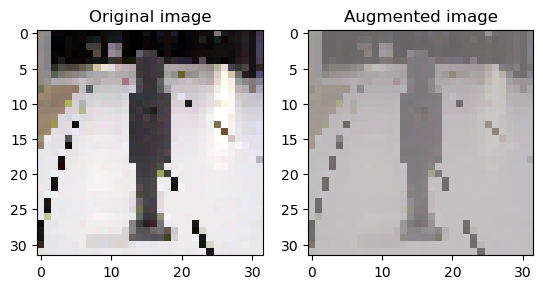

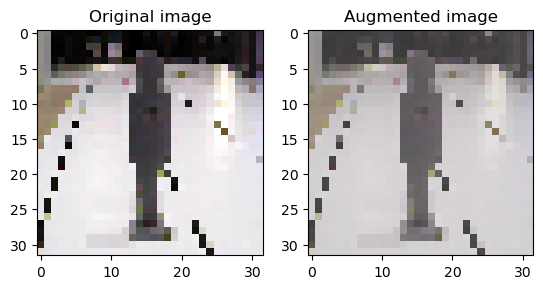

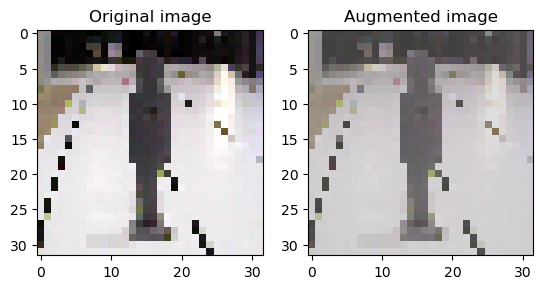

In [43]:
seed = random.randrange(100),(random.randrange(100))
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_contrast = tf.image.stateless_random_contrast(
      original_image, lower=0.3, upper=0.7, seed=seed)
  visualize(original_image, stateless_random_contrast)

#### Random contrast - keras

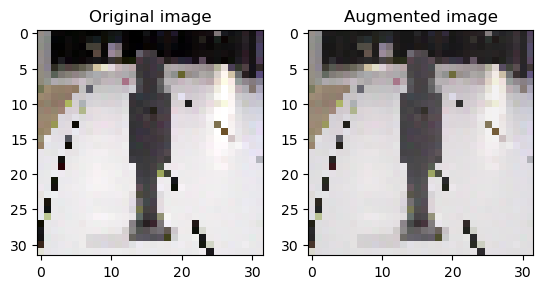

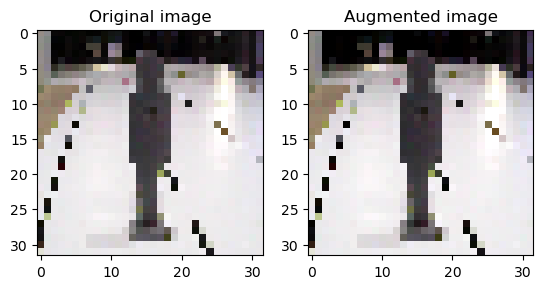

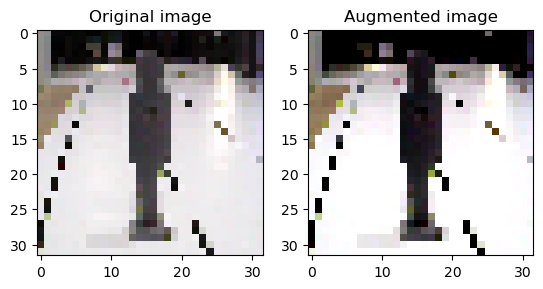

In [44]:
seed = random.randrange(100),(random.randrange(100))
data_augmentation = tf.keras.Sequential([
    layers.RandomContrast(factor=(0.3, 0.7), seed=seed)
])
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  augmented_image = np.uint8(data_augmentation(original_image))
  visualize(original_image, augmented_image)

#### Random crop

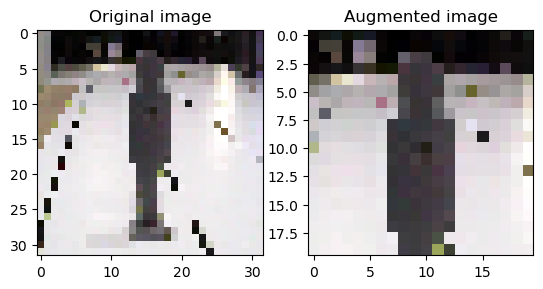

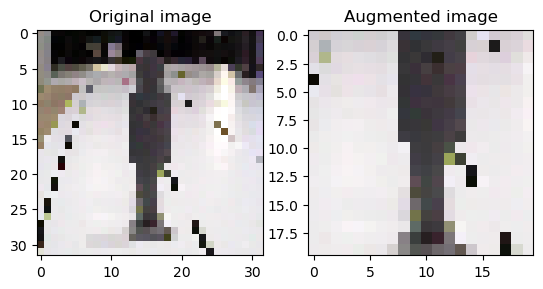

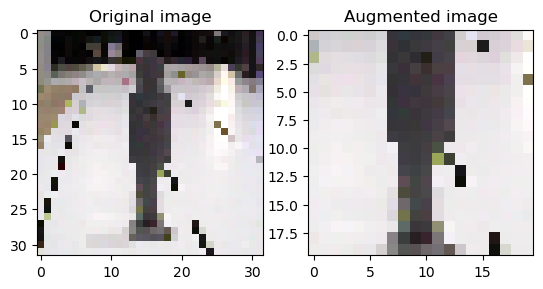

In [16]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_crop = tf.image.stateless_random_crop(
      original_image, size=[20, 20, 3], seed=seed)
  visualize(original_image, stateless_random_crop)